# Exercise 4.2 of chapter 4 of One-Dimensional Optimization by Antoniou


$f(x) = -5x^5+4x^4-12x^3+11x^2-2x+1$

Interval = $[-0.5, 0.5]$

Uncertainty less than $10^{-5}$

In [ ]:
import sys
if '..' not in sys.path:
    sys.path.append('..')
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import brute
from functions import order5_polynomial
from functions import functionObj
from models.optimizers import DichotomousSearch, FibonacciSearch, GoldenSectionSearch, \
                                QuadraticInterpolationSearch, CubicInterpolation, DaviesSwannCampey, \
                                BacktrackingLineSearch


In [20]:
f_x = functionObj(order5_polynomial)
epsilon = 1e-5
interval = [-0.5, 0.5]
np.random.seed = 42

Brute Force Method
X: 0.109837582 
F_x: 0.897632976
Function evals: 43


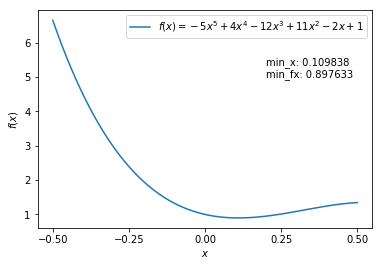

In [21]:
x = np.linspace(-0.5, 0.5, 100)
min_brute = brute(f_x, ((-0.5, 0.5), ), full_output = True)
print('Brute Force Method')
print('X: %.9f \nF_x: %.9f'%(min_brute[0][0], f_x(min_brute[0][0], save_eval = False)))
print('Function evals: %d'%(f_x.fevals))
plt.plot(x, f_x(x, save_eval = False), label = '$f(x) = -5x^5+4x^4-12x^3+11x^2-2x+1$')
plt.annotate('min_x: %.6f'%(min_brute[0][0]) +'\nmin_fx: %.6f'%(min_brute[1]), xy=(0.2,5), xycoords='data') 
plt.xticks([-0.5, -0.25, 0.0, 0.25, 0.5])
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.legend()
plt.show()

## Dichotomous search

In [22]:
f_x.reset_fevals()
optimizer = DichotomousSearch(f_x, epsilon = epsilon/10, interval = interval, xtol = epsilon)

In [23]:
x_min = optimizer.find_min()

In [24]:
print('X: %.9f \nF_x: %.9f'%(x_min, f_x(x_min, save_eval = False)))
print('Function evals: %d'%(f_x.fevals))

X: 0.109859247 
F_x: 0.897632972
Function evals: 34


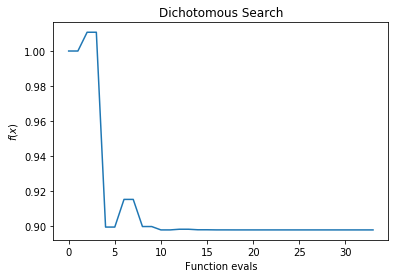

In [25]:
plt.plot(range(f_x.fevals), f_x.all_evals)
plt.xlabel('Function evals')
plt.ylabel('$f(x)$')
plt.title('Dichotomous Search')
plt.show()

## Fibonacci search

In [26]:
f_x.reset_fevals()
optimizer = FibonacciSearch(f_x, interval = interval, xtol = epsilon)
x_min = optimizer.find_min()

In [27]:
print('X: %.9f \nF_x: %.9f'%(x_min, f_x(x_min, save_eval = False)))
print('Function evals: %d'%(f_x.fevals))

X: 0.109860383 
F_x: 0.897632972
Function evals: 3


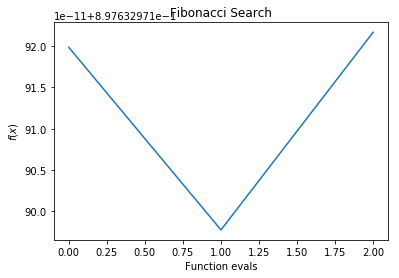

In [28]:
plt.plot(range(f_x.fevals), f_x.all_evals)
plt.xlabel('Function evals')
plt.ylabel('$f(x)$')
plt.title('Fibonacci Search')
plt.show()

## Golden-Section Search

In [29]:
f_x.reset_fevals()
optimizer = GoldenSectionSearch(f_x, interval = interval, xtol = epsilon)
x_min = optimizer.find_min()

In [30]:
print('X: %.9f \nF_x: %.9f'%(x_min, f_x(x_min, save_eval = False)))
print('Function evals: %d'%(f_x.fevals))

X: 0.109858813 
F_x: 0.897632972
Function evals: 3


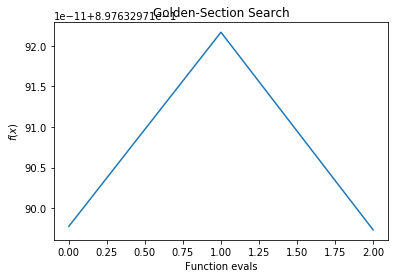

In [31]:
plt.plot(range(f_x.fevals), f_x.all_evals)
plt.xlabel('Function evals')
plt.ylabel('$f(x)$')
plt.title('Golden-Section Search')
plt.show()

## Quadratic Interpolation Method

In [32]:
f_x.reset_fevals()
optimizer = QuadraticInterpolationSearch(f_x, interval = interval, xtol = epsilon)
x_min = optimizer.find_min()

In [33]:
print('X: %.9f \nF_x: %.9f'%(x_min, f_x(x_min, save_eval = False)))
print('Function evals: %d'%(f_x.fevals))

X: 0.109858391 
F_x: 0.897632972
Function evals: 5


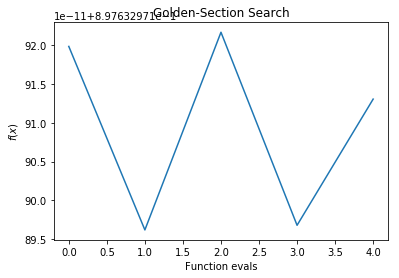

In [34]:
plt.plot(range(f_x.fevals), f_x.all_evals)
plt.xlabel('Function evals')
plt.ylabel('$f(x)$')
plt.title('Quadratic Interpolation Method')
plt.show()

## Cubic Interpolation Method

In [37]:
f_x.reset_fevals()
optimizer = CubicInterpolation(f_x, initial_xs = np.random.uniform(-0.5, 0.5, size=3), interval = interval, xtol = epsilon)
x_min = optimizer.find_min()

0.10815797868458671
0.10984339032452108
0.10985990129195834
0.10985991508621601


In [36]:
print('X: %.9f \nF_x: %.9f'%(x_min, f_x(x_min, save_eval = False)))
print('Function evals: %d'%(f_x.fevals))

X: 0.109859969 
F_x: 0.897632972
Function evals: 8


In [ ]:
plt.plot(range(f_x.fevals), f_x.all_evals)
plt.xlabel('Function evals')
plt.ylabel('$f(x)$')
plt.title('Cubic Interpolation Method')
plt.show()

## Davies, Swann and Campey

In [39]:
f_x.reset_fevals()
optimizer = DaviesSwannCampey(f_x, x_0 = np.random.uniform(-0.5, 0.5, size=1), interval = interval, xtol = epsilon)
x_min = optimizer.find_min()

In [40]:
print('X: %.9f \nF_x: %.9f'%(x_min, f_x(x_min, save_eval = False)))
print('Function evals: %d'%(f_x.fevals))

X: 0.109860599 
F_x: 0.897632972
Function evals: 10


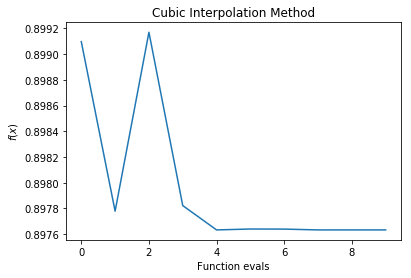

In [41]:
plt.plot(range(f_x.fevals), f_x.all_evals)
plt.xlabel('Function evals')
plt.ylabel('$f(x)$')
plt.title('Cubic Interpolation Method')
plt.show()

## Backtracking Line Search

In [46]:
f_x.reset_fevals()
optimizer = BacktrackingLineSearch(f_x, initial_x = np.random.uniform(-0.5, 0.5, size=1), interval = interval, xtol = epsilon)
x_min = optimizer.find_min()

In [47]:
print('X: %.9f \nF_x: %.9f'%(x_min, f_x(x_min, save_eval = False)))
print('Function evals: %d'%(f_x.fevals))

X: 0.109859359 
F_x: 0.897632972
Function evals: 35


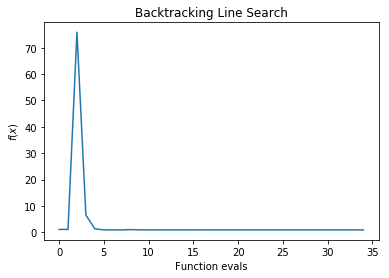

In [48]:
plt.plot(range(f_x.fevals), f_x.all_evals)
plt.xlabel('Function evals')
plt.ylabel('$f(x)$')
plt.title('Backtracking Line Search')
plt.show()